Detector pointing & scanning strategy
====

This notebook describes how to generate the scanning strategy of our experiment:
* Defining the site of observation on Earth for which we will make the observations.
* Defining the region(s) of the sky to observe.
* Defining the schedule of observations.
* Run the scan!

We will focus on three scanning strategies: deep patch, shallow patch, and a custom one!

In [1]:
## Import basic modules and routines
from __future__ import division, absolute_import, print_function

## In case you did not install properly the library 
## or didn't update your bashrc. (Do it later!)
import os
path_to_s4cmb = '../../s4cmb'
os.sys.path.insert(0, os.path.realpath(path_to_s4cmb))

import numpy as np
import pylab as pl

We put our instrument in the Atacama desert, Chile (lon=-67:46.816, lat=-22:56.396), at an elevation of 5200 meters.
Our scanning strategy will consist in scanning the sky back and forth in azimuth at constant elevation.

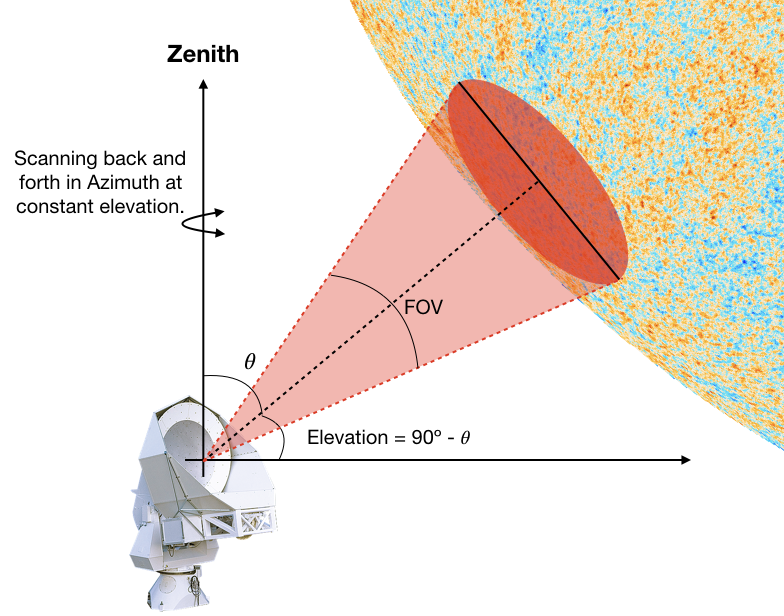

In [2]:
from IPython.display import Image
Image(filename='../data/telescope_config.png')

**Deep patch**

We first focus on the Southern sky (where BICEP scans the sky for example).
We will perform 12 deep scans (CES) of roughly 4h, one per day.
We will start the observation January, 1st 2013.
We will set the sampling frequency of the detector to be 8 Hz, and we will 
scan the sky at a speed of 0.4 deg/s.

In [3]:
from s4cmb.scanning_strategy import ScanningStrategy

scan = ScanningStrategy(nces=12, start_date='2013/1/1 00:00:00',
                        telescope_longitude='-67:46.816',
                        telescope_latitude='-22:56.396', telescope_elevation=5200.,
                        name_strategy='deep_patch', sampling_freq=8., sky_speed=0.4,
                        ut1utc_fn='../s4cmb/s4cmb/data/ut1utc.ephem',
                        language='python', verbose=True)

Note that only few scanning strategies are pre-loaded in the code (name_strategy).
This default scanning strategy corresponds to a small patch (fsky ~ 5%) in the Southern sky.
For a custom strategy (advanced users), sew below!

Let's run our scan now:

In [4]:
scan.run()

Using azimuth and LST bounds
+-----------------------------------+
 CES starts at 20130101_145310 and finishes at 20130101_194508
 It lasts 4.866 hours
+-----------------------------------+
Using azimuth and LST bounds
+-----------------------------------+
 CES starts at 20130102_194053 and finishes at 20130102_234112
 It lasts 4.006 hours
+-----------------------------------+
Using azimuth and LST bounds
+-----------------------------------+
 CES starts at 20130103_193657 and finishes at 20130103_233716
 It lasts 4.006 hours
+-----------------------------------+
Using azimuth and LST bounds
+-----------------------------------+
 CES starts at 20130104_193302 and finishes at 20130104_233321
 It lasts 4.006 hours
+-----------------------------------+
Using azimuth and LST bounds
+-----------------------------------+
 CES starts at 20130105_192906 and finishes at 20130105_232925
 It lasts 4.006 hours
+-----------------------------------+
Using azimuth and LST bounds
+--------------------

You probably noticed that it was quite long to run the scans despite the 
low sampling frequency (real case can have a sampling frequency frequency of O(100) Hz).
If you need speed up, you can change the language for the core computations, 
by setting language='fortran' when you create an instance of scanning_strategy.
Note that you need first to compile the fortran source. See the setup.py or the provided Makefile.
For real runs, always set language='fortran'.

You can access the parameters for each scan directly:

In [5]:
 scan.scan0.keys()

['lastmjd',
 'firstmjd',
 'sky_speed',
 'nces',
 'elevation',
 'clock-utc',
 'sample_rate',
 'RA',
 'azimuth',
 'CES',
 'Dec',
 'nts']

For visualisation, you can also project the data onto sky. Note that this option is not yet available
if you are interfacing with fortran for speed-up (because RA and Dec are not computed at this stage). It is meant to
be used for debugging and quickly testing scanning strategy (i.e. small instrument).
Note also that the scanning strategy module computes the scan parameters for one reference 
detectors (the pointing for all detectors in the focal plane is done later while processing TOD). 
Therefore for better visualisation, we provide a trick to simulate as if you had a full focal plane based
on the reference detector parameters ("focal plane convolution", nicely provided by Neil G.W.).

Stats: nhits = 11480/196608 (fsky=5.84%), max hit = 2451655
38.0877367699 141.91226323 -51.9122632301 51.9122632301
The interval between parallels is 10 deg 0.00'.
The interval between meridians is 6 deg 0.00'.


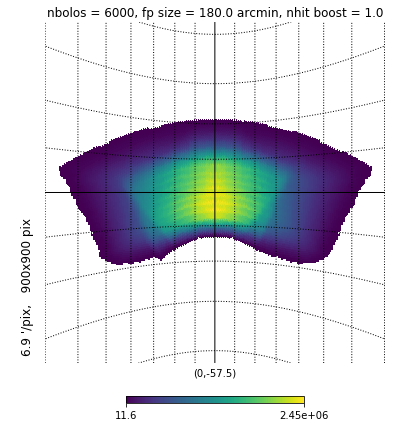

In [6]:
scan.visualize_my_scan(nside=128)

Et voilà, you are ready to simulate Time-Ordered Data now! You can find additinonal information here: http://simonsobservatory.wikidot.com/scan-strategy-systmodule.

**Shallow patch**

Let's now focus on scanning a large fraction of sky (~40%). In order to do this, we load the scanning strategy called 'shallow_patch', and run the scan:

In [7]:
from s4cmb.scanning_strategy import ScanningStrategy
scan_act = ScanningStrategy(
    nces=6, start_date='2013/1/1 00:00:00',
    telescope_longitude='-67:46.816',
    telescope_latitude='-22:56.396', telescope_elevation=5200.,
    name_strategy='shallow_patch', sampling_freq=8., sky_speed=0.4,
    ut1utc_fn='../s4cmb/s4cmb/data/ut1utc.ephem',
    language='python', verbose=True)
scan_act.run()

Using RA and Dec bounds
+-----------------------------------+
 CES starts at 20130101_085635 and finishes at 20130101_163534
 It lasts 7.650 hours
+-----------------------------------+
Using RA and Dec bounds
+-----------------------------------+
 CES starts at 20130103_014954 and finishes at 20130103_092849
 It lasts 7.649 hours
+-----------------------------------+
Using RA and Dec bounds
+-----------------------------------+
 CES starts at 20130104_211351 and finishes at 20130105_065244
 It lasts 9.648 hours
+-----------------------------------+
Using RA and Dec bounds
+-----------------------------------+
 CES starts at 20130107_134148 and finishes at 20130107_232032
 It lasts 9.646 hours
+-----------------------------------+
Using RA and Dec bounds
+-----------------------------------+
 CES starts at 20130109_214859 and finishes at 20130110_072723
 It lasts 9.640 hours
+-----------------------------------+
Using RA and Dec bounds
+-----------------------------------+
 CES starts a

Note that the generation of scans is pretty slow. Again, setting language='fortran' will speed-up the process (but you won't be able to visualize at this stage your scans). Let's have a look at our scan:

Stats: nhits = 74621/196608 (fsky=37.95%), max hit = 223485
0.0 180.0 -180.0 180.0
The interval between parallels is 30 deg -0.00'.
The interval between meridians is 30 deg -0.00'.


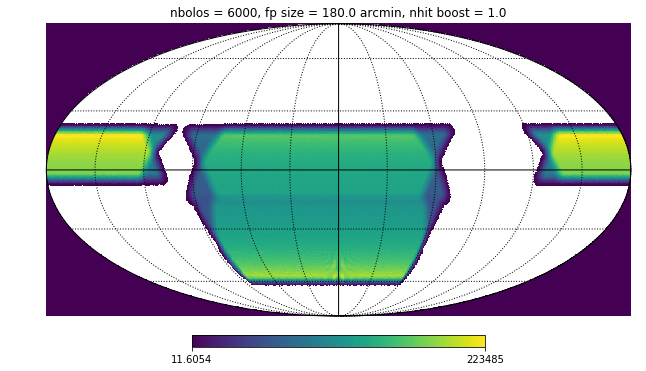

In [8]:
scan_act.visualize_my_scan(nside=128, rot=[0., 0.], fullsky=True)

**How to create a custom scanning strategy?**

In order to create a scanning strategy, you need to be familiar with couple of things.
To create a scanning strategy within s4cmb, you need to specify either

* Elevations + minimum and maximum azimuths (spatial bounds) + begining and end Local Sidereal Times (timing bounds)
* Elevations + minimum and maximum declinations + begining and end Right Ascensions (spatial & timing bounds) + orientations (east/west)

for each scan. Note that you cannot mix both! For example 'deept_patch' uses the former, while 'shallow_patch' uses the latter. There are no real reasons why to chose one or the other, it is more by convenience! (have a look at the routine define_boundary_of_scan in s4cmb/scanning_strategy).

You first need to load the custom scanning strategy:

In [9]:
my_scan = ScanningStrategy(
    nces=None, start_date='2013/1/1 00:00:00',
    telescope_longitude='-67:46.816',
    telescope_latitude='-22:56.396', telescope_elevation=5200.,
    name_strategy='custom', sampling_freq=8., sky_speed=0.4,
    ut1utc_fn='../s4cmb/s4cmb/data/ut1utc.ephem',
    language='python', verbose=True)

Then from this empty scanning strategy (all args are set to None), you can specify your own parameters (they will overwrite the pre-defined ones). For example, let's imagine we want to run 7 scans, with increasing elevations defined by their azimuth and LST bounds:

Using azimuth and LST bounds
+-----------------------------------+
 CES starts at 20130101_145310 and finishes at 20130101_194508
 It lasts 4.866 hours
+-----------------------------------+
Using azimuth and LST bounds
+-----------------------------------+
 CES starts at 20130102_194053 and finishes at 20130102_234112
 It lasts 4.006 hours
+-----------------------------------+
Using azimuth and LST bounds
+-----------------------------------+
 CES starts at 20130103_193657 and finishes at 20130103_233716
 It lasts 4.006 hours
+-----------------------------------+
Using azimuth and LST bounds
+-----------------------------------+
 CES starts at 20130104_193302 and finishes at 20130104_233321
 It lasts 4.006 hours
+-----------------------------------+
Using azimuth and LST bounds
+-----------------------------------+
 CES starts at 20130105_192906 and finishes at 20130105_232925
 It lasts 4.006 hours
+-----------------------------------+
Using azimuth and LST bounds
+--------------------

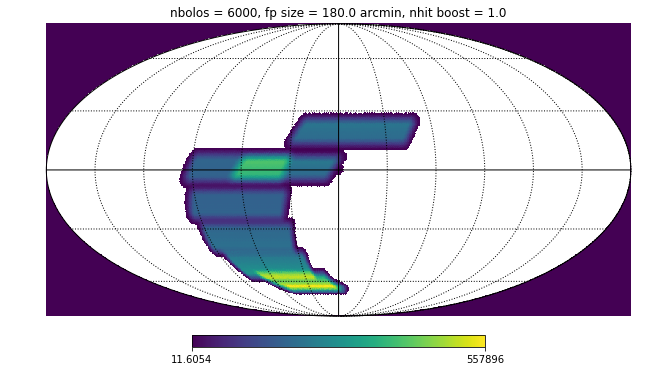

In [10]:
my_scan.name_strategy = 'MyScan'
my_scan.nces = 7

## In degree. You need to specifcy entru=ies for the 7 scans!
my_scan.elevation = [20., 25., 30., 35., 40., 45., 50.]
my_scan.az_min = [50., 70., 90., 110., 130., 150., 50.]
my_scan.az_max = [65., 85., 105., 125., 145., 165., 65.]

## Date format HH:MM:SS.CS
my_scan.begin_LST = [
    '17:07:54.84', '22:00:21.76', '22:00:21.76',
    '22:00:21.76', '22:00:21.76', '22:00:21.76',
    '22:00:21.76']

my_scan.end_LST = [
    '22:00:21.76', '02:01:01.19', '02:01:01.19',
    '02:01:01.19', '02:01:01.19', '02:01:01.19',
    '02:01:01.19', '02:01:01.19']

## Run the scan
my_scan.run()

## Visualise it
my_scan.visualize_my_scan(nside=128, rot=[0., 0.], fullsky=True)

In this example, the first scan will start at 5pm and end at 10pm on January 1st 2013 - we will scan at a constant elevation of 20 deg, between azimuths of 50 and 65 degrees. Then the second scan will happen the day after (in s4cmb, we perform one scan a day) and will start at 10pm and end at 2am. And so on.